In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch.nn.init as nninit
import uuid
import torch.onnx

In [2]:
img_size = 128
scale = 0.1
z_size = 7  # min 7
num_images = 10
#model_dir = "model_dir"
model_dir = 'models/'

In [3]:
def createInputVec(z,x,y):
    r = math.sqrt(((x*scale-(img_size*scale/2))**2) + ((y*scale-(img_size*scale/2))**2) )
    z_size = len(z)
    input = torch.rand(1,z_size + 3)
    
    for i in range(z_size):
        input[0][i] = z[i] * scale
        
    input[0][z_size] = x * scale
    input[0][z_size+1] = y * scale
    input[0][z_size+2] = r
    input = Variable(input)
    return input

## Alternative code for creating images by randomized weights ##

In [4]:
class NN(nn.Module):

    def __init__(self, activation=nn.Tanh, num_neurons=16, num_layers=9):
        """
        num_layers must be at least two
        """
        super(NN, self).__init__()
        layers = [nn.Linear(2, num_neurons, bias=True), activation()]
        for _ in range(num_layers - 1):
            layers += [nn.Linear(num_neurons, num_neurons, bias=False), activation()]
        layers += [nn.Linear(num_neurons, 3, bias=False), nn.Sigmoid()]
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

In [5]:
def init_normal(m):
    if type(m) == nn.Linear:        
        nn.init.normal_(m.weight)

In [6]:
def gen_start_image(size_x, size_y, save=True, **kwargs):
    net = NN(**kwargs)
    net.apply(init_normal)
    image = run_net(net, size_x, size_y)
    
    return net, image


def run_net(net, size_x=128, size_y=128):
    x = np.arange(0, size_x, 1)
    y = np.arange(0, size_y, 1)
    colors = np.zeros((size_x, size_y, 2))
    for i in x:
        for j in y:
            colors[i][j] = np.array([float(i) / size_y - 0.5, float(j) / size_x - 0.5])
    colors = colors.reshape(size_x * size_y, 2)
    img = net(torch.tensor(colors).type(torch.FloatTensor)).detach().numpy()
    return img.reshape(size_x, size_y, 3)

In [7]:
def create_image(size_x=128, size_y=128):
    #net= NN(num_neurons=11, num_layers=2)
    net = NN()
    net.apply(init_normal)
    x = np.arange(0, size_x, 1)
    y = np.arange(0, size_y, 1)
    colors = np.zeros((size_x, size_y, 2))
    for i in x:
        for j in y:
            colors[i][j] = np.array([float(i) / size_y - 0.5, float(j) / size_x - 0.5])
    colors = colors.reshape(size_x * size_y, 2)
    img = net(torch.tensor(colors).type(torch.FloatTensor)).detach().numpy()
    return img.reshape(size_x, size_y, 3)

In [8]:
# Exploration of code and tensor sizes
size_x = 128
size_y = 256
x = np.arange(0, size_x, 1)
y = np.arange(0, size_y, 1)
colors = np.zeros((size_x, size_y, 2))
for i in x:
    for j in y:
        colors[i][j] = np.array([float(i) / size_y - 0.5, float(j) / size_x - 0.5])
print(colors.shape)
colors = colors.reshape(size_x * size_y, 2)
print(colors.shape)

(128, 256, 2)
(32768, 2)


In [9]:
def plot_image(image, fig_size=4):
    plt.figure(figsize=(fig_size, fig_size))
    plt.imshow(image, interpolation='nearest', vmin=0, vmax=1)

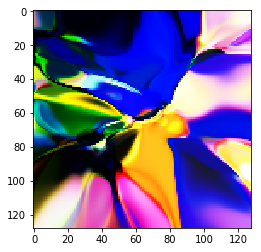

In [10]:
net, output = gen_start_image(size_x=128, size_y=128)
plot_image(output)